In [1]:
## Hierarchical clustering

index<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\final\\index2017.csv')

In [2]:
str(index)
rownames(index)<-index$Abbr

'data.frame':	186 obs. of  32 variables:
 $ CountryID                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country.Name                 : Factor w/ 186 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Abbr                         : Factor w/ 186 levels "AFG","AGO","ALB",..: 1 3 48 2 5 6 7 8 9 17 ...
 $ Region                       : Factor w/ 5 levels "Americas","Asia-Pacific",..: 2 3 4 5 1 3 2 3 2 1 ...
 $ World.Rank                   : int  163 65 172 165 156 33 5 30 68 90 ...
 $ Region.Rank                  : int  40 30 14 41 26 19 4 17 15 19 ...
 $ X2017.Score                  : num  48.9 64.4 46.5 48.5 50.4 70.3 81 72.3 63.6 61.1 ...
 $ Property.Rights              : num  12.6 54 38.2 36.4 32.4 55.5 81.7 86 50.5 45.3 ...
 $ Judical.Effectiveness        : num  28.4 28.5 29.6 19.8 39.6 42.5 92.9 81.8 33 48.7 ...
 $ Government.Integrity         : num  27.5 39.7 31.7 12.8 38.2 43.4 74.8 75.2 37.6 38.2 ...
 $ Tax.Burden                   : num  91.6 86.9 81.1 87.7 62.6 83.7 63.2 5

In [3]:
index1<-index[1:7,c('Unemployment','GDP.per.Capita.PPP')]
# AS variables are completelly on different scales it would have been better to scale first 
# the variables then calculate distance

In [4]:
d<-dist(index1,method = 'euclidean')
d

          AFG       ALB       DZA       AGO       ARG       ARM
ALB  9354.003                                                  
DZA 12557.000  3203.007                                        
AGO  5397.000  3957.012  7160.001                              
ARG 20607.000 11253.005  8050.001 15210.000                    
ARM  6521.003  2833.000  6036.003  1124.034 14086.003          
AUS 45442.000 36088.002 32885.000 40045.000 24835.000 38921.001

In [5]:
cl<-hclust(d,method = 'complete')
cl


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 7 


In [6]:
cl$merge
index1
# by the matrix from cl$merge we can see the steps in each distance calcualtion with cases with - signs


-4,-6
-2,-3
-1,1
-5,2
3,4
-7,5


,Unemployment,GDP.per.Capita.PPP
AFG,9.6,1947
ALB,17.3,11301
DZA,10.5,14504
AGO,7.6,7344
ARG,6.7,22554
ARM,16.3,8468
AUS,6.3,47389


In [7]:
cl$merge
d

-4,-6
-2,-3
-1,1
-5,2
3,4
-7,5


          AFG       ALB       DZA       AGO       ARG       ARM
ALB  9354.003                                                  
DZA 12557.000  3203.007                                        
AGO  5397.000  3957.012  7160.001                              
ARG 20607.000 11253.005  8050.001 15210.000                    
ARM  6521.003  2833.000  6036.003  1124.034 14086.003          
AUS 45442.000 36088.002 32885.000 40045.000 24835.000 38921.001

In [8]:
cl$height

[1]  1124.034  3203.007  6521.003 11253.005 20607.000 45442.000

In [9]:
cl$merge

-4,-6
-2,-3
-1,1
-5,2
3,4
-7,5


In [11]:
d<-dist(index1,method='euclidean')
d

          AFG       ALB       DZA       AGO       ARG       ARM
ALB  9354.003                                                  
DZA 12557.000  3203.007                                        
AGO  5397.000  3957.012  7160.001                              
ARG 20607.000 11253.005  8050.001 15210.000                    
ARM  6521.003  2833.000  6036.003  1124.034 14086.003          
AUS 45442.000 36088.002 32885.000 40045.000 24835.000 38921.001

In [12]:
cl$height

[1]  1124.034  3203.007  6521.003 11253.005 20607.000 45442.000

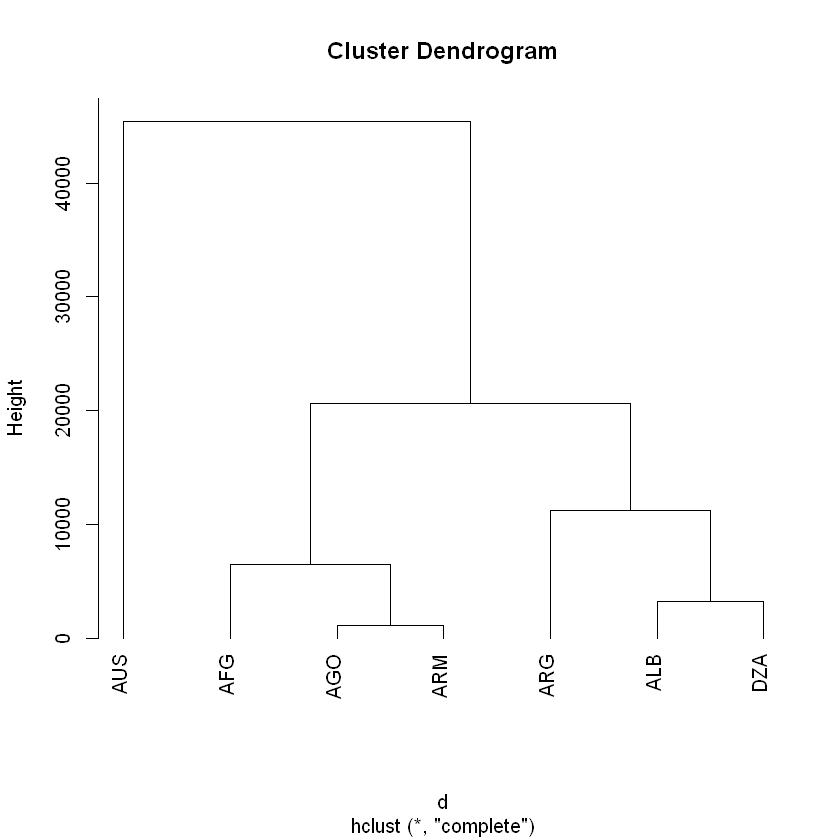

In [13]:
plot(cl,hang=-1)

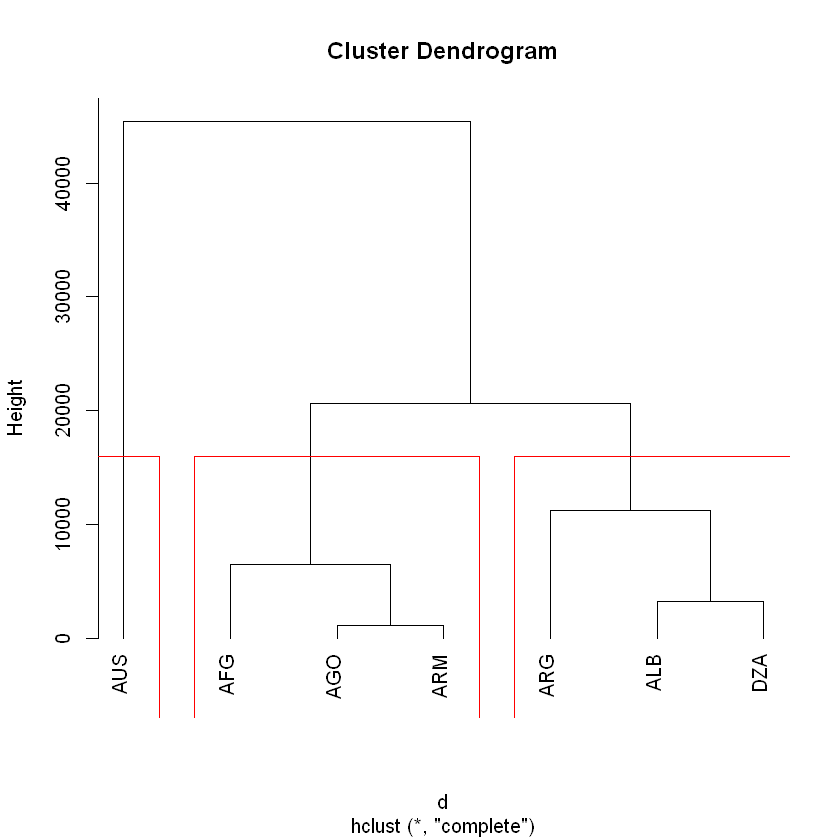

In [14]:
plot(cl,hang=-1)
rect.hclust(cl,3)

In [15]:
index1$cl_membership<-cutree(cl,k=3)
index1

,Unemployment,GDP.per.Capita.PPP,cl_membership
AFG,9.6,1947,1
ALB,17.3,11301,2
DZA,10.5,14504,2
AGO,7.6,7344,1
ARG,6.7,22554,2
ARM,16.3,8468,1
AUS,6.3,47389,3


In [16]:
index1[order(index1$cl_membership),]

,Unemployment,GDP.per.Capita.PPP,cl_membership
AFG,9.6,1947,1
AGO,7.6,7344,1
ARM,16.3,8468,1
ALB,17.3,11301,2
DZA,10.5,14504,2
ARG,6.7,22554,2
AUS,6.3,47389,3


In [17]:
scale(index1,center = TRUE,scale=TRUE)

,Unemployment,GDP.per.Capita.PPP,cl_membership
AFG,-0.22577942,-0.9403588,-0.9449112
ALB,1.48823619,-0.3238785,0.3779645
DZA,-0.02543993,-0.1127832,0.3779645
AGO,-0.67097828,-0.5846667,-0.9449112
ARG,-0.87131777,0.4177563,0.3779645
ARM,1.26563676,-0.5105889,-0.9449112
AUS,-0.96035754,2.0545198,1.7008401


In [18]:
index2<-as.data.frame(scale(index1,center = TRUE,scale=TRUE))

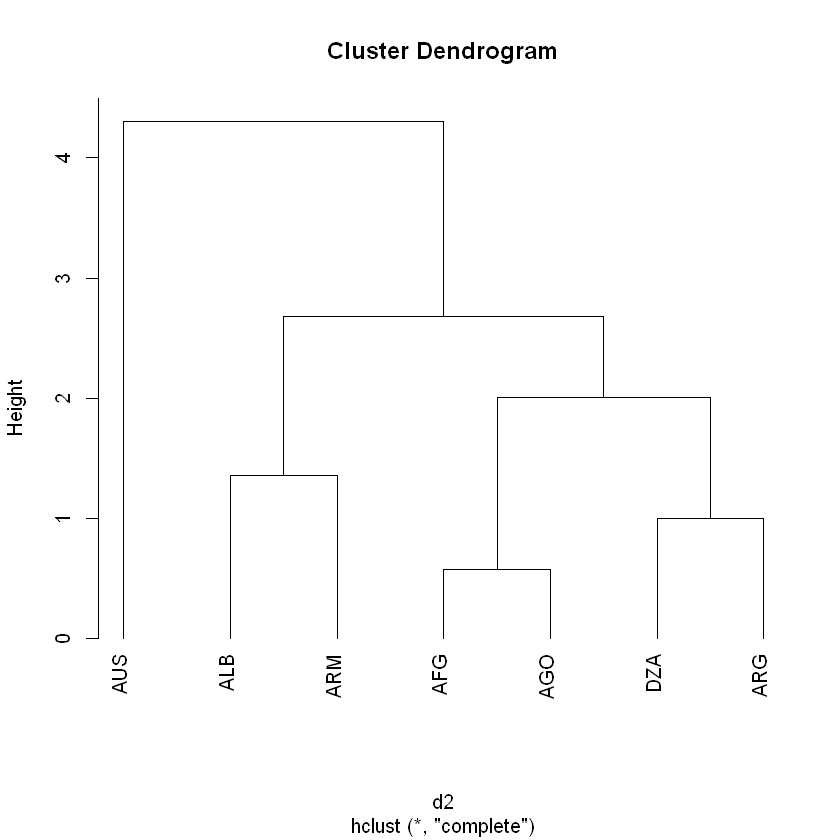

In [19]:
d2<-dist(index2,method = 'euclidean')
cl2<-hclust(d2,method = 'complete')
plot(cl2,hang=-1)

In [20]:
cl$cl_membership<-cutree(cl2,k=3)

In [21]:
index1

,Unemployment,GDP.per.Capita.PPP,cl_membership
AFG,9.6,1947,1
ALB,17.3,11301,2
DZA,10.5,14504,2
AGO,7.6,7344,1
ARG,6.7,22554,2
ARM,16.3,8468,1
AUS,6.3,47389,3


In [22]:
## K_means clustering
library(ggplot2)

In [23]:
colnames(index)
index2<-index[,c('Unemployment','GDP.per.Capita.PPP')]
index2<-index2[complete.cases(index2),]
index2_sc<-as.data.frame(scale(index2))
km1<-kmeans(index2_sc,centers = 3)

[1] "CountryID"                     "Country.Name"                 
 [3] "Abbr"                          "Region"                       
 [5] "World.Rank"                    "Region.Rank"                  
 [7] "X2017.Score"                   "Property.Rights"              
 [9] "Judical.Effectiveness"         "Government.Integrity"         
[11] "Tax.Burden"                    "Gov.t.Spending"               
[13] "Fiscal.Health"                 "Business.Freedom"             
[15] "Labor.Freedom"                 "Monetary.Freedom"             
[17] "Trade.Freedom"                 "Investment.Freedom"           
[19] "Financial.Freedom"             "Tariff.Rate"                  
[21] "Income.Tax.Rate"               "Corporate.Tax.Rate"           
[23] "Tax.Burden.perc.of.GDP"        "Gov.t.Expenditure.perc.of.GDP"
[25] "Population_Millions"           "GDP.Billions.PPP"             
[27] "GDP.Growth.Rate"               "GDP.per.Capita.PPP"           
[29] "Unemployment"                  "Inflation.Perc"               
[31] "FDI.Inflow.Millions"           "Public.Debt.Perc.of.GDP"

In [24]:
names(km1)
km1$cluster

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

AFG ALB DZA AGO ARG ARM AUS AUT AZE BHS BHR BGD BRB BLR BEL BLZ BEN BTN BOL BIH 
  1   3   1   1   1   3   2   2   1   1   2   1   1   1   2   1   1   1   1   3 
BWA BRA BGR BFA MMR BDI KHM CMR CAN CPV CAF TCD CHL CHN COL COM COD COG CRI CIV 
  3   1   1   1   1   1   1   1   2   1   1   1   1   1   1   3   1   1   1   1 
HRV CYP CZE DNK DJI DOM ECU EGY SLV GNQ ERI EST ETH FJI FIN FRA GAB GMB GEO DEU 
  3   3   1   2   3   1   1   1   1   1   1   1   1   1   2   2   3   3   1   2 
GHA GRC GTM GIN GNB GUY HTI HND HKG HUN ISL IND IDN IRN IRQ IRL ISR ITA JAM JPN 
  1   3   1   1   1   1   1   1   2   1   2   1   1   1   3   2   2   2   1   2 
JOR KAZ KEN KOR KWT KGZ LAO LVA LBN LSO LBR LBY LTU LUX MAC MKD MDG MWI MYS MDV 
  1   1   1   2   2   1   1   1   1   3   1   3   1   2   2   3   1   1   1   1 
MLI MLT MRT MUS MEX MDA MNG MNE MAR MOZ NAM NPL NLD NZL NIC NER NGA NOR OMN PAK 
  1   2   3   1   1   1   1   3   1   3   3   1   2   2   1   1   1   2   2   1 
PAN PNG PRY PER PHL POL PRT QAT ROU RUS RWA LCA VCT WSM STP SAU SEN SRB SLE SGP 
  1   1   1   1   1   1   1   2   1   1   1   3   3   1   1   2   1   3   1   2 
SVK SVN SLB ZAF ESP LKA SDN SUR SWZ SWE CHE TWN TJK TZA THA TGO TON TTO TUN TUR 
  1   1   3   3   3   1   1   1   3   2   2   2   1   1   1   1   1   2   1   1 
TKM UGA UKR ARE GBR USA URY UZB VUT VEN VNM YEM ZMB ZWE BRN 
  1   1   1   2   2   2   1   1   1   1   1   3   1   1   2

In [25]:
km1$centers

,Unemployment,GDP.per.Capita.PPP
1,-0.2916477,-0.4211617
2,-0.5249025,1.6272829
3,1.9010286,-0.3468012


In [26]:
# Total sum of Squares
km1$totss
sum(km1$withinss)+km1$betweenss

[1] 348

[1] 348

In [27]:
# Within SUm of Squares
km1$withinss

[1] 42.21621 38.53746 34.44320

In [28]:
# Between group Sum of Squares
km1$betweenss

[1] 232.8031

In [29]:
km1$betweenss/km1$totss

[1] 0.6689745

In [32]:
index2_sc$cl<-km1$cluster

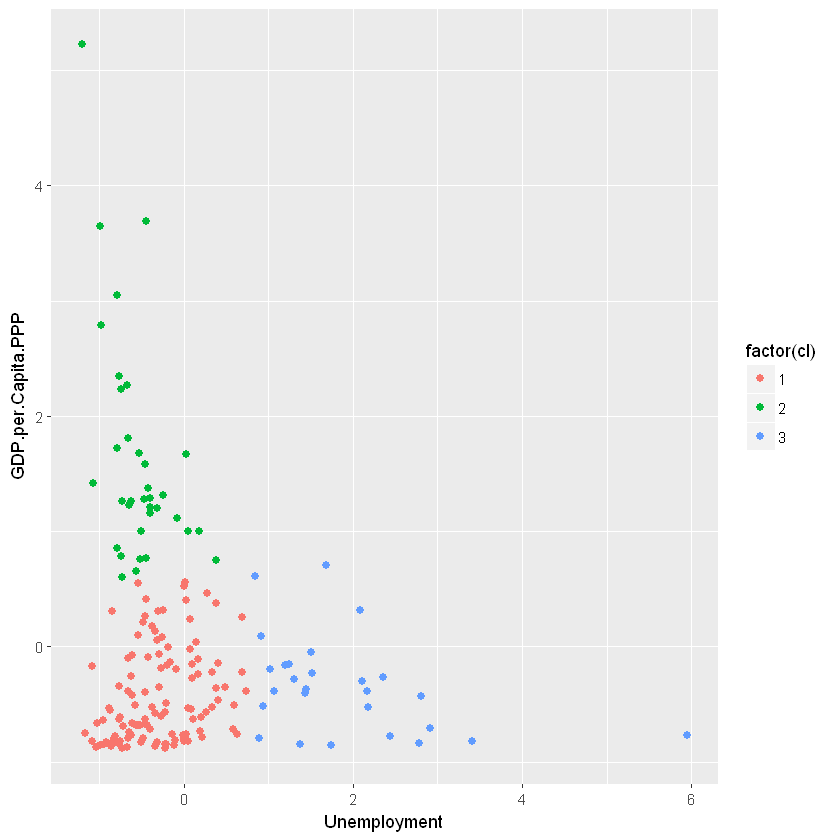

In [33]:
ggplot(data=index2_sc,aes(x=Unemployment,y=GDP.per.Capita.PPP,col=factor(cl)))+geom_point(size=2)

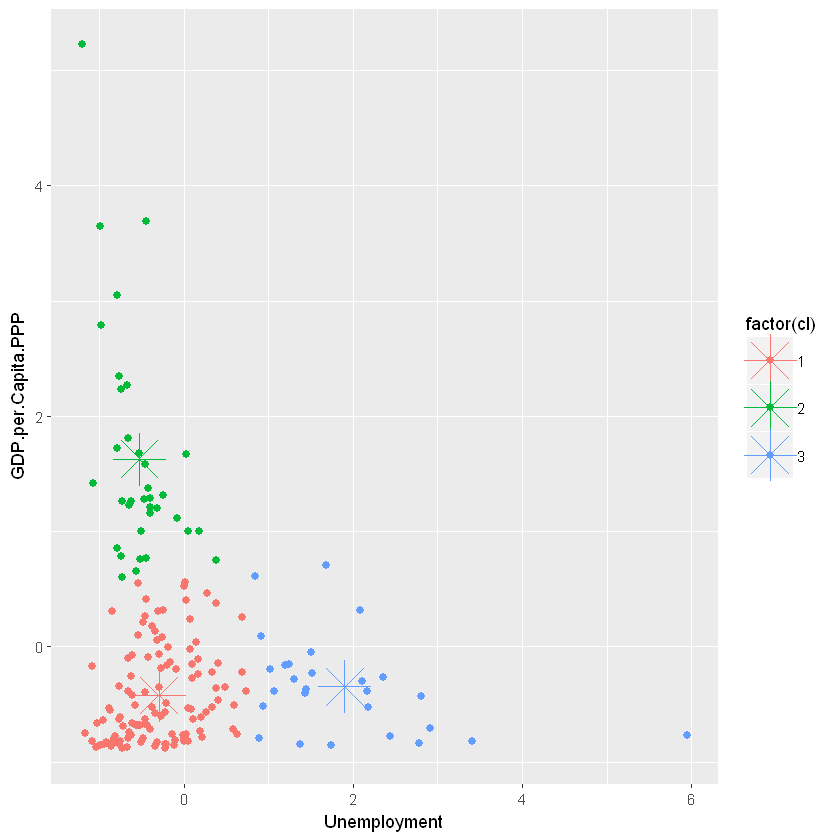

In [34]:
ggplot(data=index2_sc,aes(x=Unemployment,y=GDP.per.Capita.PPP,col=factor(cl)))+geom_point(size=2)+
  geom_point(data=data.frame(km1$centers,cl=factor(1:3)),aes(Unemployment,GDP.per.Capita.PPP,col=cl),
                                                            pch=8,size=10)


In [35]:
# The goal is to increase between sum of squares/total sum of squares, and decrease within sum of squares/ total
# sum of squares


In [36]:
index<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\final\\index2017.csv')
index1<-index[complete.cases(index),]
rownames(index2)<-index2$Abbr
index2<-index1[,c(8:19)]
index2_sc<-as.data.frame(scale(index2))

In [37]:
# simple loop for calculating within sum/total sum
B_T<-c()
for(i in 1:10){
  set.seed(1)
  km1<-kmeans(index2_sc,i)
  B_T[i]<-km1$tot.withinss/km1$totss
}


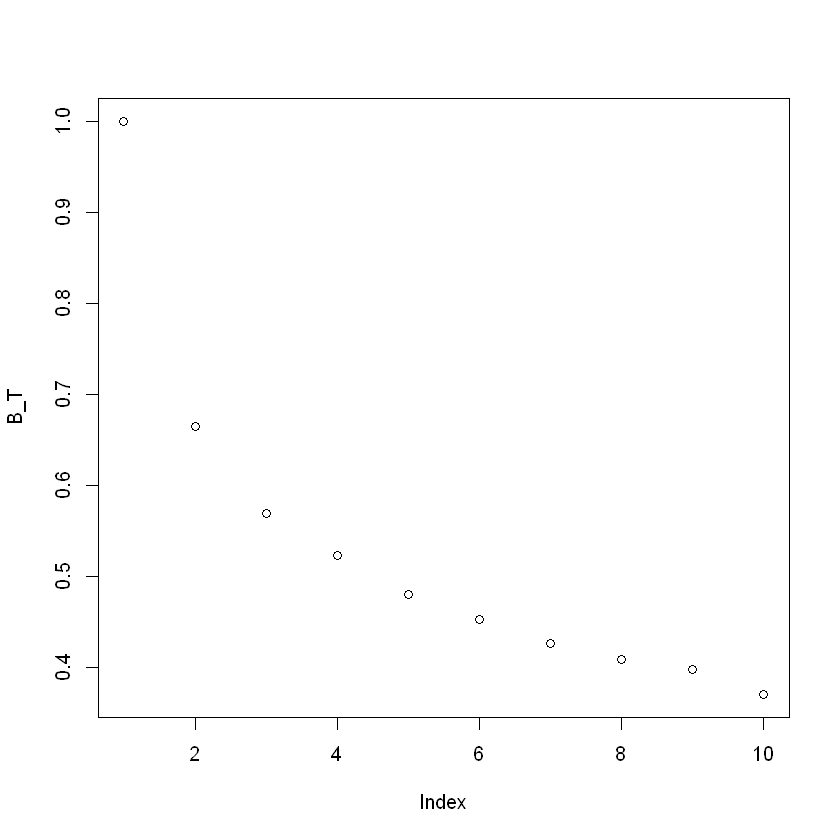

In [38]:
plot(B_T)

In [40]:
# install.packages('factoextra')
library(factoextra)

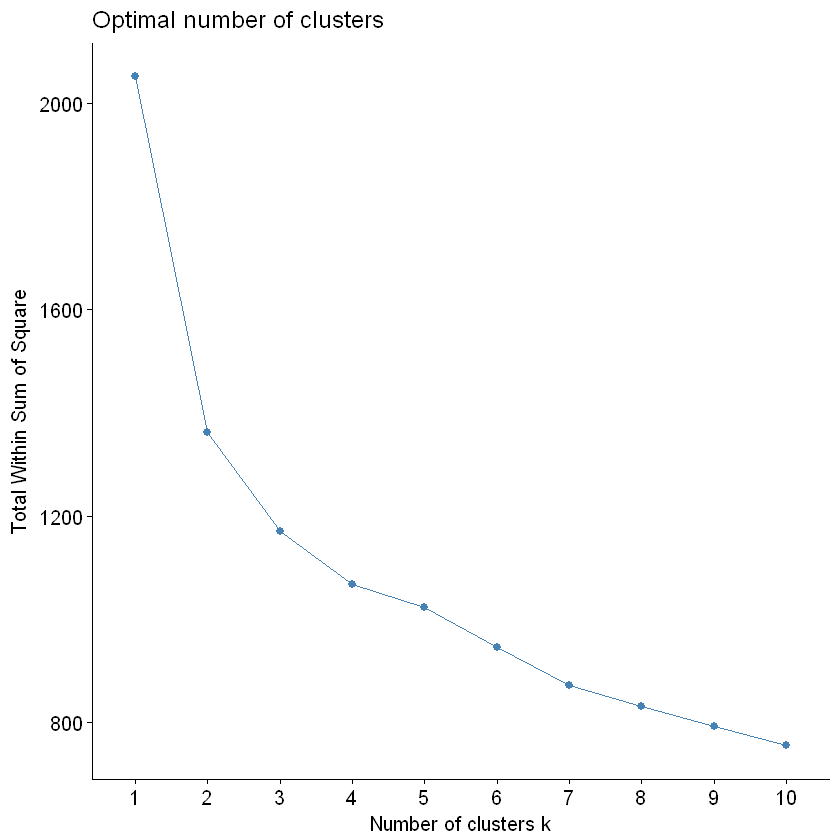

In [41]:
set.seed(1)
fviz_nbclust(index2_sc,kmeans,method = 'wss')